# Naive Bayes - Class Exercise 2

## Introduction

## Metadata (Data Dictionary)

| No.| Variable | Data Type | Description |
|----|----------|-----------|-------------|
| 1  | fixed acidity | float | Fixed acidity measured |
| 2  | volatile acidity | float | Volatile acidity measured|
| 3  | citric acid | float | Amount of citric acid |
| 4  | residual sugar | float | Amount of residual sugar |
| 5  | chlorides | float | Amount of chlorides |
| 6  | free sulfur dioxide | float | Amount of free sulfur dioxide |
| 7  | total sulfur dioxide | float | Amount of total sulfur dioxide |
| 8  | density | float | Density measured |
| 9  | pH | float | pH value measured |
| 10 | sulphates | float | Amount of sulphates |
| 11 | alcohol | float | Amount of alcohol |
| 12 | Type | string | Type of Wine (R: Red, W: White) |


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Import Data

In [2]:
df = pd.read_csv('Wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,8.1,0.46,0.31,1.7,0.052,50.0,183.0,0.99230,3.03,0.42,11.2,R
1,5.2,0.28,0.29,1.1,0.028,18.0,69.0,0.99168,3.24,0.54,10.0,W
2,6.2,0.19,0.38,5.1,0.019,22.0,82.0,0.98961,3.05,0.36,12.5,W
3,10.6,0.83,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,R
4,6.8,0.46,0.26,2.7,0.042,28.0,83.0,0.99114,3.38,0.51,12.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,8.1,0.45,0.34,8.3,0.037,33.0,216.0,0.99760,3.31,0.64,9.7,W
6493,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,R
6494,6.9,0.28,0.27,2.1,0.036,42.0,121.0,0.99260,3.42,0.49,10.8,W
6495,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,R


In [3]:
df['Type'] = df['Type'].map({'R': 0, 'W': 1})

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.602894
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.489336
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


df.describe() shows 12 columns. That means all columns are in numeric data type.

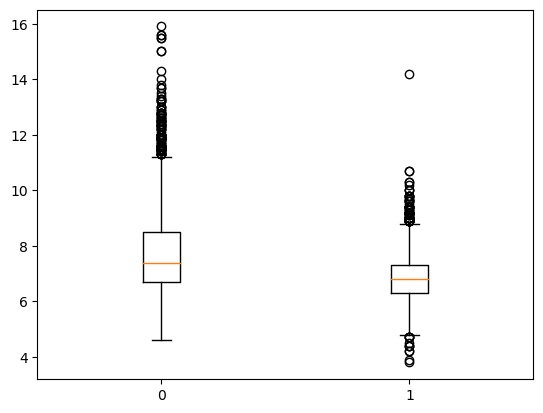

In [5]:
# We can make a conditional box plot for any variable against the label

feature = 'fixed acidity'
labels = [0, 1]
y = [df[feature][df['Type'] == label] for label in labels]

plt.boxplot(y, labels=labels)
plt.show()

In [6]:
# Get the label and the features

label = 'Type'
features = [feature for feature in df.columns if feature != label]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df.shape, test_df.shape

((5197, 12), (1300, 12))

In [9]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

In [10]:
df_x = df[features]
df_y = df[label]

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gnb = GaussianNB()

In [13]:
gnb.fit(train_x, train_y)
test_yhat = gnb.predict(test_x)

In [14]:
metrics.confusion_matrix(test_y, test_yhat)

array([[337, 193],
       [ 55, 715]], dtype=int64)

In [15]:
def get_classification_metrics(y, yhat):
    # Record the total number of samples
    n = len(y)
    
    # Count the number of correct samples and calculate the accuracy
    n_correct = (y == yhat).sum()
    accuracy = n_correct / n
    
    # One way to calculate the error rate
    error_rate = 1 - accuracy
    
    # The other way to calculate the error rate
    n_incorrect = (y != yhat).sum()
    error_rate = n_incorrect / n
    
    # Count the number of true positive
    TP = ((y == 1) & (yhat == 1)).sum()
    
    # Count the number of false positive
    FP = ((y == 0) & (yhat == 1)).sum()
    
    # Count the number of true negative
    TN = ((y == 0) & (yhat == 0)).sum()
    
    # Count the number of false negative
    FN = ((y == 1) & (yhat == 0)).sum()
    
    # Calculate sensitivity / specificity / precision / recall
    sensitivity = recall = TP / (TP + FN)
    specificity = TN / (FP + TN)
    precision = TP / (TP + FP)
    
    item = ['Accuracy', 'Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'Recall']
    value = accuracy, error_rate, sensitivity, specificity, precision, recall
    
    df_out = {'Item': item, 'Value': value}
    df_out = pd.DataFrame(df_out)
    return df_out

In [16]:
get_classification_metrics(test_y, test_yhat)

,Item,Value
0,Accuracy,0.809231
1,Error Rate,0.190769
2,Sensitivity,0.928571
3,Specificity,0.635849
4,Precision,0.787445
5,Recall,0.928571
